In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import matplotlib.image as mpimg
import seaborn as sns

np.random.seed(2)

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# 1. Data Preparation#
## 1.1 Load Data

In [59]:
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

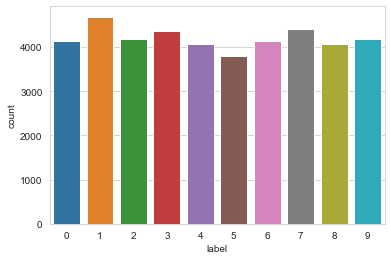

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

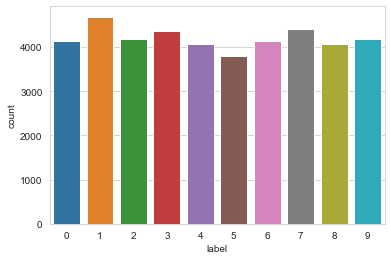

In [60]:
Y_train = train["label"]
X_train = train.drop(labels=["label"], axis=1)

g = sns.countplot(Y_train)
Y_train.value_counts()

## 2.2 Check for null and missing values


Kiểm tra xem có giá trị nào là ảnh trắng không

In [61]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

count       784
unique        1
top       False
freq        784
dtype: object

In [62]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

count       784
unique        1
top       False
freq        784
dtype: object

## 2.3 Normalization
Đơn giản hóa data vì nhận diện số nên chuẩn hóa vecto thang màu về
2 giá trị 0,1 để tính toán nhanh

In [63]:
X_train = X_train / 255.0
test = test / 255.0

## 2.4 Reshape

In [64]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)


## 2.5 Label Encoding

In [65]:
Y_train = to_categorical(Y_train, num_classes = 10)
